In [95]:
# Any imported libraries needed for this research
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy import stats

To begin, the data set of statistics of every Stanley Cup champions since the 1959-60 NHL season will be loaded into a DataFrame.

In [96]:
df_champions = pd.read_csv("StanleyCupWinners.csv")

My goal is to see whether a team's offense, defense, or goaltending has the biggest impact on that team's success, and then using my findings I will predict which teams in the current season have the best chance of winning this year's Stanley Cup. In order to do this, I am going to see whether there is any distinct correlation between a team's regular season stats and win percentage by checking each Stanley Cup Champion dating back to the 1959-60 NHL season.

In [97]:
# The win percentage of every Stanley Cup champion in each respective season is calculated
df_champions['Win Percentage'] = df_champions.W / df_champions.GP
df_champions

,Season,Lg,Team,AvAge,GP,W,L,T,OL,PTS,...,PK%,SH,SHA,SOG,S%,SA,SV%,PDO,SO,Win Percentage
0,2020-21,NHL,Tampa Bay Lightning,28.4,56,36,17,NaN,3.0,75,...,84.15,3.0,3.0,1692,10.6,1583,0.908,100.8,6,0.642857
1,2019-20,NHL,Tampa Bay Lightning,27.7,70,43,21,NaN,6.0,92,...,81.39,6.0,7.0,2176,11.2,2165,0.910,101.9,4,0.614286
2,2018-19,NHL,St. Louis Blues,28.0,82,45,28,NaN,9.0,99,...,81.47,5.0,7.0,2604,9.4,2345,0.906,100.2,9,0.548780
3,2017-18,NHL,Washington Capitals,28.4,82,49,26,NaN,7.0,105,...,80.30,4.0,8.0,2379,10.8,2613,0.909,101.4,3,0.597561
4,2016-17,NHL,Pittsburgh Penguins,28.7,82,50,21,NaN,11.0,111,...,79.77,5.0,7.0,2745,10.1,2671,0.914,101.0,5,0.609756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1963-64,NHL,Toronto Maple Leafs,NaN,70,33,25,12.0,NaN,78,...,88.72,7.0,6.0,2249,8.5,2155,0.920,NaN,8,0.471429
57,1962-63,NHL,Toronto Maple Leafs,NaN,70,35,23,12.0,NaN,82,...,NaN,NaN,NaN,2340,9.4,1957,0.908,NaN,2,0.500000
58,1961-62,NHL,Toronto Maple Leafs,NaN,70,37,22,11.0,NaN,85,...,NaN,NaN,NaN,2251,10.3,2185,0.918,NaN,3,0.528571
59,1960-61,NHL,Chicago Black Hawks,NaN,70,29,24,17.0,NaN,75,...,NaN,NaN,NaN,2181,9.1,2205,0.918,NaN,6,0.414286


I am going to begin by simply checking one major stat in each of the 3 subcategories I have established (Offense, Defense, and Goaltending) that I believe to be most representative of a team's play in each of those 3 ares.

- For Goaltending, I am going to check the correlation between a team's Save Percentage over the course of the season and their Win Percentage
- For Defense, I am going to check the correlation between a team's Total Shots Against them throughtout the season and their Win Percentage
- Lastly, for Offense, I am going to check the correlation between a team's Goals For per Game average and their Win Percentage

<AxesSubplot:xlabel='SV%', ylabel='Win Percentage'>

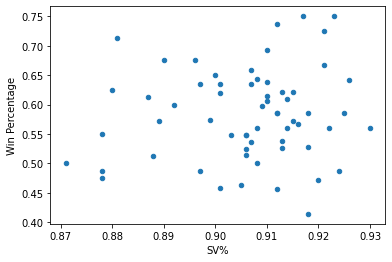

In [98]:
# Scatter plot of Save Percentage in relation to Win Percentage
df_champions.plot.scatter(x='SV%', y='Win Percentage')

<AxesSubplot:xlabel='SA', ylabel='Win Percentage'>

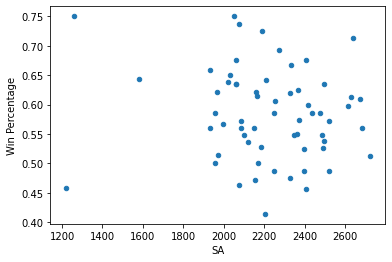

In [99]:
# Scatter plot of Shots Against in relation to Win Percentage\
df_champions.plot.scatter(x='SA', y='Win Percentage')

<AxesSubplot:xlabel='GF/G', ylabel='Win Percentage'>

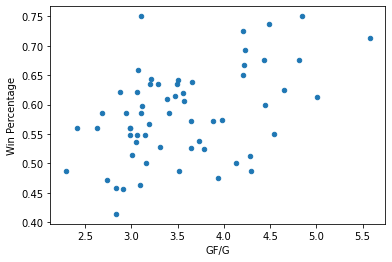

In [100]:
# Scatter plot of Goals Score per Game in relation to Win Percentage
df_champions.plot.scatter(x='GF/G', y='Win Percentage')

<AxesSubplot:xlabel='GF/G', ylabel='Win Percentage'>

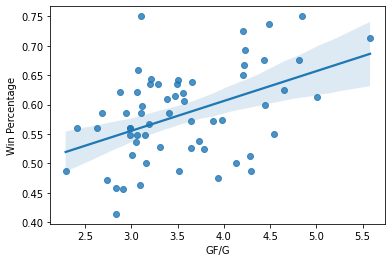

In [101]:
# Goals For per Game scatter plot with the 
sns.regplot(x=df_champions['GF/G'], y=df_champions['Win Percentage'])

In [102]:
# Multiple linear regression model is made. The y-intercept and the coefficients of each variable are calculated.
model = LinearRegression()
model.fit(df_champions[["GF/G", "GF", "SOG", "S%"]], df_champions['Win Percentage'])

MLR_b0 = model.intercept_
MLR_bi = model.coef_

print("The intercept (ß0) = " + str(MLR_b0) + ".")
print("The coefficient estimates are " + str(MLR_bi) + ".")

The intercept (ß0) = 0.7434416551561771.
The coefficient estimates are [ 0.12559711  0.00130765 -0.00013127 -0.05760818].


Multiple Regression Equation:

Win Percentage = 0.7434416551561771 + (0.12559711)(GF/G) + (0.00130765)(GF) + (-0.00013127)(SOG) + (-0.05760818)(S%)

Using this equation, I am going to use today's team statistics from the 2021-22 season (as of Monday, December 6th) to project a team's win percentage and success at the end of the year based off of their current offensive production. Because we are only a quarter of the way through the season, I am going to multiply a team's Total Goals and Total Shots on Goal by 4 to estimate what those values are going to be at the end of the season, but I am going to keep their Goals For per Game and Shooting Percentages the same because those are averages and should not change if their Total Goals and Total Shots increase at a constant rate throughout the season.

In [103]:
# Data set of the current NHL season and each team's stats are read into df_current and every team's current win percentage is calculated
df_current = pd.read_csv("2021-22NHLSeason.csv")
df_current['Current Win Percentage'] = df_current.W / df_current.GP
df_current

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Current Win Percentage
0,Florida Panthers,27.3,24,17,4,3,37,0.771,92,65,...,2,3,8.3,9.8,881,10.4,746,0.913,0,0.708333
1,Washington Capitals,28.7,25,15,4,6,36,0.720,88,61,...,4,3,6.3,7.6,772,11.4,697,0.912,4,0.600000
2,Toronto Maple Leafs,28.0,26,17,7,2,36,0.692,80,61,...,1,0,7.7,7.3,896,8.9,812,0.925,4,0.653846
3,Minnesota Wild,29.1,24,17,6,1,35,0.729,89,70,...,1,0,10.6,9.7,820,10.9,742,0.906,0,0.708333
4,Calgary Flames,28.5,25,15,5,5,35,0.700,79,51,...,2,1,9.2,7.7,851,9.3,741,0.931,7,0.600000
5,New York Rangers,26.3,23,16,4,3,35,0.761,67,57,...,1,1,9.3,9.1,652,10.3,734,0.922,2,0.695652
6,Tampa Bay Lightning,29.1,24,15,5,4,34,0.708,79,63,...,2,0,10.3,9.4,713,11.1,727,0.913,2,0.625000
7,Carolina Hurricanes,27.9,23,16,6,1,33,0.717,75,52,...,1,2,9.6,8.1,770,9.7,634,0.918,1,0.695652
8,Edmonton Oilers,28.3,23,16,7,0,32,0.696,84,70,...,4,0,8.6,7.0,730,11.5,788,0.911,0,0.695652
9,Anaheim Ducks,27.6,25,13,8,4,30,0.600,83,72,...,2,3,9.2,11.0,799,10.4,827,0.913,2,0.520000


In [104]:
# Calculates the Projected Win Percentage of each team based off of their current offensive production this season
df_current['Projected Win Percentage'] = 0.7434416551561771 + (0.12559711)*(df_current['GF/G']) + (0.00130765)*(df_current['GF'] * 4) + (-0.00013127)*(df_current['S'] * 4) + (-0.05760818)*(df_current['S%'])
df_current

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Current Win Percentage,Projected Win Percentage
0,Florida Panthers,27.3,24,17,4,3,37,0.771,92,65,...,3,8.3,9.8,881,10.4,746,0.913,0,0.708333,0.643973
1,Washington Capitals,28.7,25,15,4,6,36,0.720,88,61,...,3,6.3,7.6,772,11.4,697,0.912,4,0.600000,0.583741
2,Toronto Maple Leafs,28.0,26,17,7,2,36,0.692,80,61,...,0,7.7,7.3,896,8.9,812,0.925,4,0.653846,0.565544
3,Minnesota Wild,29.1,24,17,6,1,35,0.729,89,70,...,0,10.6,9.7,820,10.9,742,0.906,0,0.708333,0.616436
4,Calgary Flames,28.5,25,15,5,5,35,0.700,79,51,...,1,9.2,7.7,851,9.3,741,0.931,7,0.600000,0.570947
5,New York Rangers,26.3,23,16,4,3,35,0.761,67,57,...,1,9.3,9.1,652,10.3,734,0.922,2,0.695652,0.523663
6,Tampa Bay Lightning,29.1,24,15,5,4,34,0.708,79,63,...,0,10.3,9.4,713,11.1,727,0.913,2,0.625000,0.556041
7,Carolina Hurricanes,27.9,23,16,6,1,33,0.717,75,52,...,2,9.6,8.1,770,9.7,634,0.918,1,0.695652,0.582072
8,Edmonton Oilers,28.3,23,16,7,0,32,0.696,84,70,...,0,8.6,7.0,730,11.5,788,0.911,0,0.695652,0.595439
9,Anaheim Ducks,27.6,25,13,8,4,30,0.600,83,72,...,3,9.2,11.0,799,10.4,827,0.913,2,0.520000,0.575900


In [109]:
# Sorts teams based off their current win percentage and lists the top 5 teams
df_current.sort_values('Current Win Percentage', ascending=False).head(n=5)

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Current Win Percentage,Projected Win Percentage
0,Florida Panthers,27.3,24,17,4,3,37,0.771,92,65,...,3,8.3,9.8,881,10.4,746,0.913,0,0.708333,0.643973
3,Minnesota Wild,29.1,24,17,6,1,35,0.729,89,70,...,0,10.6,9.7,820,10.9,742,0.906,0,0.708333,0.616436
5,New York Rangers,26.3,23,16,4,3,35,0.761,67,57,...,1,9.3,9.1,652,10.3,734,0.922,2,0.695652,0.523663
7,Carolina Hurricanes,27.9,23,16,6,1,33,0.717,75,52,...,2,9.6,8.1,770,9.7,634,0.918,1,0.695652,0.582072
8,Edmonton Oilers,28.3,23,16,7,0,32,0.696,84,70,...,0,8.6,7.0,730,11.5,788,0.911,0,0.695652,0.595439


In [110]:
# Sorts teams based off their projected win percentage at the end of the season and lists the top 5 teams
df_current.sort_values('Projected Win Percentage', ascending=False).head(n=5)

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Current Win Percentage,Projected Win Percentage
0,Florida Panthers,27.3,24,17,4,3,37,0.771,92,65,...,3,8.3,9.8,881,10.4,746,0.913,0,0.708333,0.643973
19,Colorado Avalanche,27.7,21,12,7,2,26,0.619,84,71,...,1,9.6,12.8,691,12.2,634,0.888,0,0.571429,0.619550
3,Minnesota Wild,29.1,24,17,6,1,35,0.729,89,70,...,0,10.6,9.7,820,10.9,742,0.906,0,0.708333,0.616436
8,Edmonton Oilers,28.3,23,16,7,0,32,0.696,84,70,...,0,8.6,7.0,730,11.5,788,0.911,0,0.695652,0.595439
1,Washington Capitals,28.7,25,15,4,6,36,0.720,88,61,...,3,6.3,7.6,772,11.4,697,0.912,4,0.600000,0.583741


If offense truly is the key to success in the NHL, then these 5 teams (Florida Panthers, Colorado Avalanche, Minnesota Wild, Edmonton Oilers, and Washington Capitals) have the best chance of attaining that championship-level success this year.